In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
assets = ['PG', '^GSPC']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2010-1-1')['Adj Close']

In [3]:
pf_data.head()

,PG,^GSPC
Date,,
2010-01-04,45.510941,1132.989990
2010-01-05,45.525822,1136.520020
2010-01-06,45.309883,1137.140015
2010-01-07,45.064171,1141.689941
2010-01-08,45.004593,1144.979980


In [4]:
pf_data.tail()

,PG,^GSPC
Date,,
2019-01-29,93.540001,2640.000000
2019-01-30,94.519997,2681.050049
2019-01-31,96.470001,2704.100098
2019-02-01,97.470001,2706.530029
2019-02-05,97.653397,2732.560059


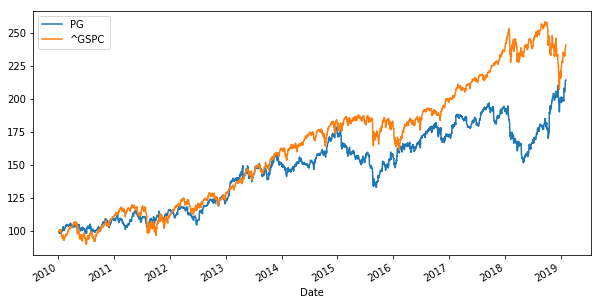

In [5]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5))

In [6]:
log_returns = np.log(pf_data / pf_data.shift(1))

In [7]:
log_returns.mean() * 250

PG       0.083494
^GSPC    0.096279
dtype: float64

In [8]:
log_returns.cov() * 250

,PG,^GSPC
PG,0.021374,0.011683
^GSPC,0.011683,0.022498


In [9]:
log_returns.corr()

,PG,^GSPC
PG,1.000000,0.532783
^GSPC,0.532783,1.000000


In [10]:
num_assets = len(assets)

In [11]:
num_assets

2

In [12]:
arr = np.random.random(2)
arr

array([ 0.64334778,  0.62686315])

In [13]:
arr[0] + arr[1]

1.270210928092973

In [14]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([ 0.30711586,  0.69288414])

In [15]:
weights[0] + weights[1]

1.0

Expected Portfolio Return:

In [16]:
np.sum(weights * log_returns.mean()) * 250

0.092352882177080375

Expected Portfolio Variance:

In [17]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.017789139148462346

Expected Portfolio Volatility:

In [18]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

0.13337593166858233

***

In [19]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))

pfolio_returns, pfolio_volatilities

([0.087576159707467835,
  0.087860054452265607,
  0.0888285827067853,
  0.087632886474850527,
  0.088806120929482091,
  0.090709176258603683,
  0.093716246281632887,
  0.086545499469548232,
  0.090498909498328992,
  0.083645202928211357,
  0.088442116325691766,
  0.087353387143006722,
  0.09122861718539077,
  0.09163522854334373,
  0.08812521388095311,
  0.089565703372315203,
  0.08874472268715361,
  0.088319483310510455,
  0.092813939551564306,
  0.089819850485772207,
  0.085505931112405731,
  0.084321523433748963,
  0.086123200985809625,
  0.0921726651569693,
  0.095252004690842787,
  0.092959859808160683,
  0.090728878469475485,
  0.0946238672888388,
  0.088919656114101936,
  0.092564393919166627,
  0.095145338204910446,
  0.089649174980504398,
  0.089221222858421281,
  0.088183071978367958,
  0.090760345669148021,
  0.092185476801243907,
  0.083902841350015536,
  0.084965539953741009,
  0.084372976304435021,
  0.086327138333997203,
  0.088146377436025269,
  0.089575083311563025,
  

In [20]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([ 0.08596792,  0.09097387,  0.0898354 ,  0.09055927,  0.08697108,
         0.09317197,  0.09046674,  0.0918283 ,  0.08803235,  0.09177002,
         0.09108482,  0.09120578,  0.08560315,  0.08893033,  0.09103342,
         0.09326386,  0.08777491,  0.08438187,  0.08958911,  0.08942145,
         0.08672988,  0.09338923,  0.08841899,  0.08798554,  0.08981233,
         0.09339609,  0.08839069,  0.08808794,  0.09118335,  0.08775203,
         0.08569253,  0.09395456,  0.08993568,  0.09036244,  0.09047763,
         0.09063982,  0.0904382 ,  0.08966598,  0.08683081,  0.09592141,
         0.0889732 ,  0.08843925,  0.09349798,  0.08967538,  0.09095736,
         0.09042628,  0.09412791,  0.0904748 ,  0.09085323,  0.09190469,
         0.09204316,  0.08589927,  0.09204497,  0.09546652,  0.09246748,
         0.09202891,  0.09451656,  0.08552845,  0.09070199,  0.08866958,
         0.08736553,  0.09142799,  0.08786466,  0.09110114,  0.08924214,
         0.09128407,  0.08430848,  0.09551848,  0.0